In [1]:
import pandas as pd
import datetime
from dateutil import parser
from statistics import mean
import numpy as np

In [2]:
rec_table = pd.read_csv("Recency_Times_GH_Rankings.csv")
log_df = pd.read_csv("log_df.csv")

In [3]:
rec_table

Unnamed: 0        AA      AABA       AAL      AAOI  \
0     2001-01-02T00:00:00.000Z       NaN  0.172998       NaN       NaN   
1     2001-01-03T00:00:00.000Z       NaN  0.171401       NaN       NaN   
2     2001-01-04T00:00:00.000Z       NaN  0.182836       NaN       NaN   
3     2001-01-05T00:00:00.000Z       NaN  0.178213       NaN       NaN   
4     2001-01-08T00:00:00.000Z       NaN  0.174241       NaN       NaN   
5     2001-01-09T00:00:00.000Z       NaN  0.169626       NaN       NaN   
6     2001-01-10T00:00:00.000Z       NaN  0.263520       NaN       NaN   
7     2001-01-11T00:00:00.000Z       NaN  0.263082       NaN       NaN   
8     2001-01-12T00:00:00.000Z       NaN  0.245696       NaN       NaN   
9     2001-01-16T00:00:00.000Z       NaN  0.246643       NaN       NaN   
10    2001-01-17T00:00:00.000Z       NaN  0.247983       NaN       NaN   
11    2001-01-18T00:00:00.000Z       NaN  0.255811       NaN       NaN   
12    2001-01-19T00:00:00.000Z       NaN  0.266331       NaN       NaN   
13    2001-01-22T00:00:00.000Z       NaN  0.262918       NaN       NaN   
14    2001-01-23T00:00:00.000Z       NaN  0.263607       NaN       NaN   
15    2001-01-24T00:00:00.000Z       NaN  0.272538       NaN       NaN   
16    2001-01-25T00:00:00.000Z       NaN  0.279534       NaN       NaN   
17    2001-01-26T00:00:00.000Z       NaN  0.269555       NaN       NaN   
18    2001-01-29T00:00:00.000Z       NaN  0.264269       NaN       NaN   
19    2001-01-30T00:00:00.000Z       NaN  0.267569       NaN       NaN   
20    2001-01-31T00:00:00.000Z       NaN  0.265361       NaN       NaN   
21    2001-02-01T00:00:00.000Z       NaN  0.258125       NaN       NaN   
22    2001-02-02T00:00:00.000Z       NaN  0.253395       NaN       NaN   
23    2001-02-05T00:00:00.000Z       NaN  0.243954       NaN       NaN   
24    2001-02-06T00:00:00.000Z       NaN  0.247517       NaN       NaN   
25    2001-02-07T00:00:00.000Z       NaN  0.248982       NaN       NaN   
26    2001-02-08T00:00:00.000Z       NaN  0.240070       NaN       NaN   
27    2001-02-09T00:00:00.000Z       NaN  0.229738       NaN       NaN   
28    2001-02-12T00:00:00.000Z       NaN  0.221611       NaN       NaN   
29    2001-02-13T00:00:00.000Z       NaN  0.221695       NaN       NaN   
...                        ...       ...       ...       ...       ...   
4279  2018-01-05T00:00:00.000Z  0.986901  0.994505  0.660705  0.553165   
4280  2018-01-08T00:00:00.000Z  0.981402  0.994505  0.657912  0.552982   
4281  2018-01-09T00:00:00.000Z  0.982760  0.991728  0.653540  0.548771   
4282  2018-01-10T00:00:00.000Z  0.976431  0.994505  0.650659  0.535111   
4283  2018-01-11T00:00:00.000Z  0.994505  0.991519  0.653205  0.532010   
4284  2018-01-12T00:00:00.000Z  0.994505  0.987668  0.994505  0.532511   
4285  2018-01-16T00:00:00.000Z  0.991111  0.984057  0.994505  0.530001   
4286  2018-01-17T00:00:00.000Z  0.986113  0.975473  0.989706  0.520786   
4287  2018-01-18T00:00:00.000Z  0.994505  0.973420  0.987718  0.517945   
4288  2018-01-19T00:00:00.000Z  0.973953  0.970966  0.985724  0.510538   
4289  2018-01-22T00:00:00.000Z  0.971716  0.968632  0.981815  0.518082   
4290  2018-01-23T00:00:00.000Z  0.968280  0.965300  0.979238  0.513746   
4291  2018-01-24T00:00:00.000Z  0.963507  0.969722  0.977280  0.514082   
4292  2018-01-25T00:00:00.000Z  0.964530  0.994505  0.959684  0.508345   
4293  2018-01-26T00:00:00.000Z  0.960965  0.994505  0.949263  0.509875   
4294  2018-01-29T00:00:00.000Z  0.962274  0.994505  0.946671  0.511323   
4295  2018-01-30T00:00:00.000Z  0.961737  0.989039  0.942235  0.498273   
4296  2018-01-31T00:00:00.000Z  0.950187  0.983237  0.939153  0.494083   
4297  2018-02-01T00:00:00.000Z  0.945207  0.985084  0.944130  0.490055   
4298  2018-02-02T00:00:00.000Z  0.944349  0.971204  0.939515  0.492664   
4299  2018-02-05T00:00:00.000Z  0.926049  0.963704  0.928925  0.487702   
4300  2018-02-06T00:00:00.000Z  0.920339  0.955266  0.915954  0.484211   
4301  2018-02-07T00:00:0

In [4]:
def top_decile_ind(data, ind, fullr=False):
    dd = data.iloc[ind][1:]
    sd = dd.sort_values(ascending=False)
    sz = len(sd) // 10
    if fullr:
        out = sd
    else:
        out = list(sd.index[:sz])
    return out

In [5]:
dd = top_decile_ind(rec_table,10)
dd

['HFC',
 'PRGO',
 'NBR',
 'SKX',
 'STZ',
 'RL',
 'PAA',
 'ATVI',
 'SHW',
 'UNP',
 'MAR',
 'KEY',
 'AEO',
 'KSU',
 'KSS',
 'VFC',
 'GPC',
 'MAT',
 'ADM',
 'SWK',
 'THC',
 'CHK',
 'BAX',
 'CBI',
 'NKE',
 'BDX',
 'MMM',
 'BMY',
 'CAT',
 'USB',
 'AET',
 'CVS',
 'JNJ',
 'CAH',
 'MDT',
 'ECL',
 'ABC',
 'MRK',
 'MCK',
 'TOL',
 'APA',
 'GD']

In [6]:
dic = {}
for i in rec_table.index:
    dt = rec_table['Unnamed: 0'][i]
    dtt = parser.parse(dt).date()
    nm = top_decile_ind(rec_table,i)
    dic[dtt] = nm

In [7]:
def backtest(price_data, signal_data, window,step=1):
    ind = []
    res = []
    for i in range(window,len(signal_data),step):
        dtt = signal_data['Unnamed: 0'][i-window]
        dt = parser.parse(dtt).date()
        tdec = dic[dt]
        out = []
        for x in tdec:
            td = price_data[x][i-window]
            fd = price_data[x][i]
            out.append(fd - td)
        ind.append(dt)
        res.append(out)
    return ind, res

In [10]:
def evolve(y,kk,ov=1):
    nx=[1.0]
    k = kk/ov
    for xset in y:
        sc = [x*k for x in xset]
        rr = nx[-1]*(1+mean(sc))
        nx.append(rr)
    return nx[1:]

In [11]:
from matplotlib.pyplot import plot
from matplotlib import pyplot as plt
def my_plot(x,y):
    plt.figure(figsize=(8,6), dpi=80)
    plot(x, y)
    return plt.show()

In [12]:
def qb(window, step,k=1):
    ind, res = backtest(log_df, rec_table, window, step)
    ov = 1
    if window > step:
        ov = window // step + 1
    ev = evolve(res,k, ov)
    return my_plot(ind, ev)

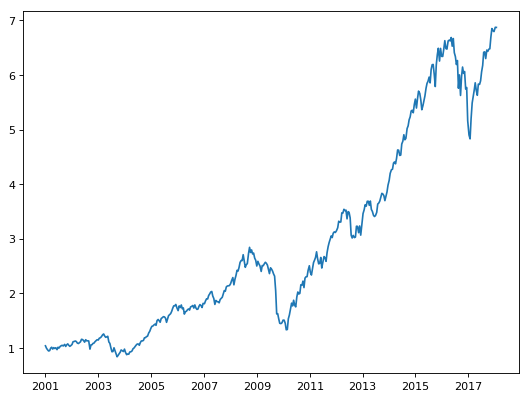

In [13]:
qb(10,10)

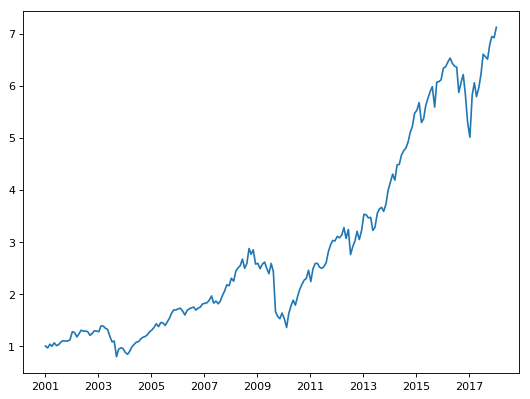

In [14]:
qb(21,21)

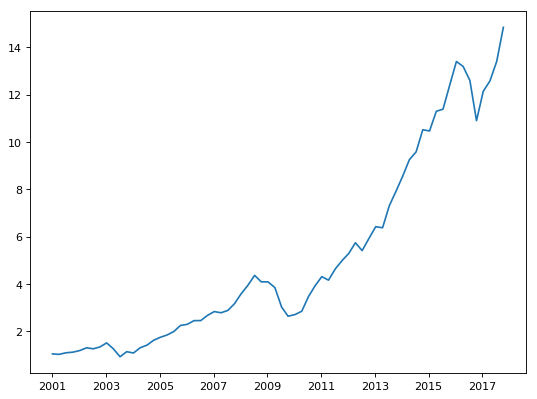

In [15]:
qb(63,63)

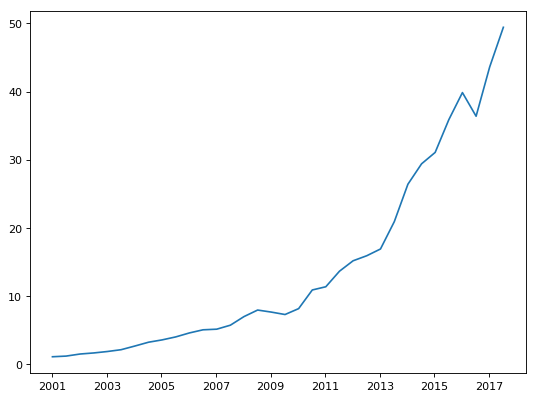

In [27]:
qb(126,126)

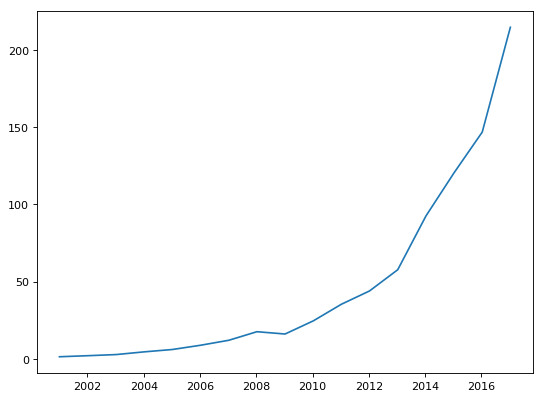

In [28]:
qb(252,252)

In [18]:
def raw_moment(vec, r):
    return 1 / len(vec) * sum(list(map(lambda i: i**r, vec)))

In [19]:
def kelly(retvec, int=6):
    moms = []
    for i in range(int):
        moms.append(raw_moment(retvec, i+1))
    p = []
    for i in range(len(moms)):
        p.append((-1)**i * moms[i])
    r = np.polynomial.polynomial.polyroots(p)
    rr = r.real[abs(r.imag)<1e-5]
    return min(rr)

In [20]:
x,yy = backtest(log_df, rec_table, 10,10)

In [21]:
#kelly...uses mean returns from each window
kt = kelly(list(map(mean,yy)))
kt

3.473775759831569

In [22]:
r0 = evolve(yy,1,1)
rkt = evolve(yy,kt,1)
rhalf = evolve(yy, kt/2,1)

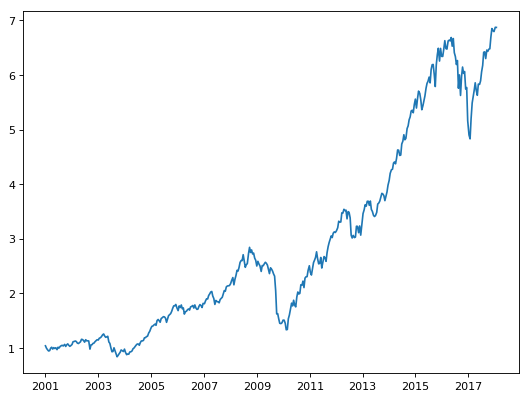

In [23]:
# no leverage, 4 overlapping portfolios
my_plot(x, r0)

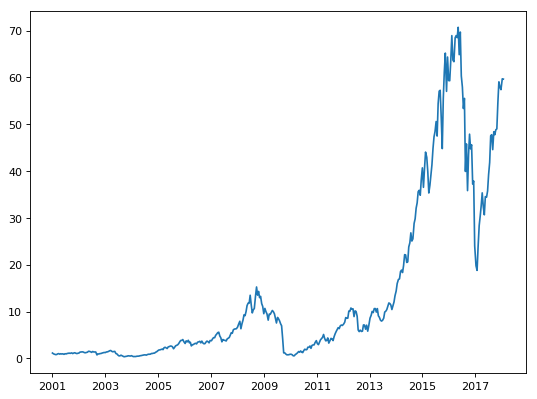

In [24]:
my_plot(x, rkt)

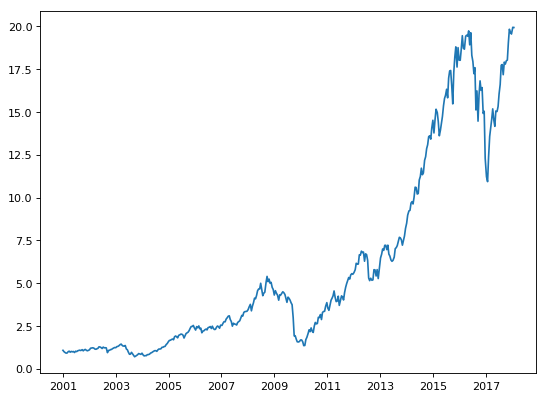

In [25]:
my_plot(x,rhalf)

In [26]:
# Sharpe ratio is great
mean(list(map(mean,yy)))/var(list(map(mean,yy)))

NameError: name 'var' is not defined